Colunas disponíveis no CSV:
['label', 'onset_s', 'offset_s', 'onset_ind', 'offset_ind', 'audio_path', 'annot_path', 'sequence', 'annotation', 'Contagem', 'Unnamed: 10']

=== CRIANDO COLUNA TEMPO TOTAL PARA PREDICTIONS ===
Coluna 'Tempototal' criada com sucesso!
Fórmula: Tempototal = offset_s - onset_s

Estatísticas da coluna Tempototal:
Total de registros: 2568
Registros com tempo total > 0: 2542
Registros com tempo total = 0: 0
Registros com tempo total < 0: 0

Valores da coluna Tempototal:
Mínimo: 0.010000 segundos
Máximo: 4.950000 segundos
Média: 0.238297 segundos
Mediana: 0.080000 segundos

=== ANÁLISE DE DURAÇÃO - PHEE ADULTO (TABELA BOSQUE) ===
Maior duração encontrada: 2.4771 segundos
Menor duração encontrada: 0.5486 segundos
Maior duração +10%: 2.7249 segundos
Menor duração -10%: 0.4389 segundos
Range entre as durações ajustadas: 2.2860 segundos

Estatísticas adicionais:
Média de duração: 1.3686 segundos
Mediana de duração: 1.4057 segundos
Desvio padrão: 0.4134 segundos
Total d

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_1408\798705974.py:228: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados_boxplot, x='Grupo', y='Tempototal',


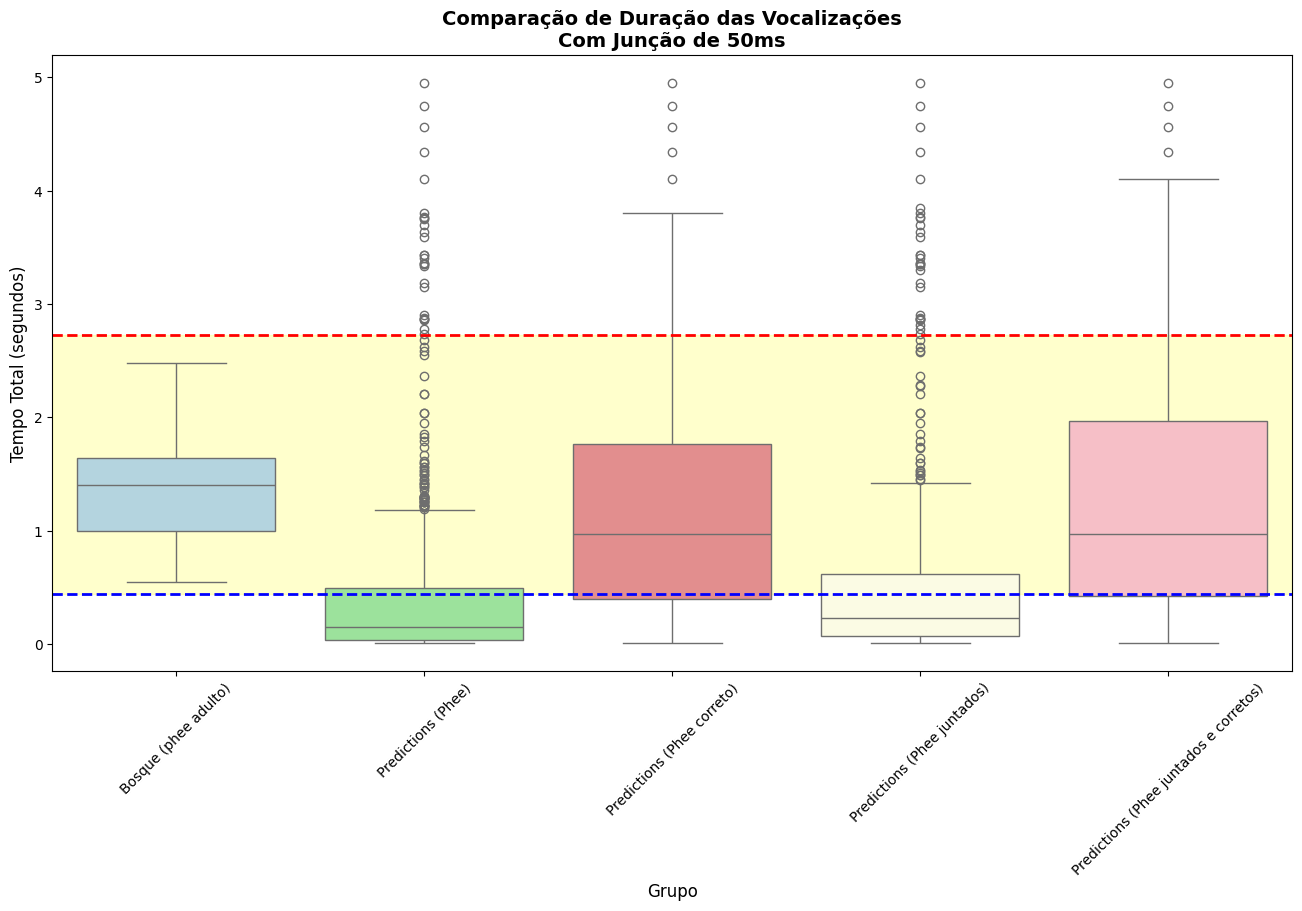

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

# Carregando os arquivos
excel_file_bosque = r'C:\Users\Ricardo\Desktop\Tabelas\Bosque_bb_adulto.xlsx'
csv_file_nova = r'C:\Users\Ricardo\Desktop\Tabelas\predictions.csv'

# Lista de abas para cada tabela - apenas Gravador 03 e 09 para Bosque
abas_bosque = ['Gravador 03', 'Gravador 09']

# Lista para armazenar os dataframes
df_bosque = []

# Carregando os DataFrames apenas das abas selecionadas da tabela Bosque
for aba in abas_bosque:
    df_temp = pd.read_excel(excel_file_bosque, sheet_name=aba)
    df_temp['Tabela'] = 'Bosque'
    df_bosque.append(df_temp)

# Concatenando os dataframes do Bosque
combined_df_bosque = pd.concat(df_bosque, ignore_index=True)

# Carregando a nova tabela (CSV)
df_nova = pd.read_csv(csv_file_nova)

# Verificando as colunas disponíveis no CSV
print("Colunas disponíveis no CSV:")
print(df_nova.columns.tolist())

# CRIANDO COLUNA TEMPO TOTAL PARA PREDICTIONS
print("\n=== CRIANDO COLUNA TEMPO TOTAL PARA PREDICTIONS ===")

# Verificando se as colunas necessárias existem
if 'onset_s' in df_nova.columns and 'offset_s' in df_nova.columns:
    # Calculando o tempo total: offset_s - onset_s
    df_nova['Tempototal'] = df_nova['offset_s'] - df_nova['onset_s']
    
    print("Coluna 'Tempototal' criada com sucesso!")
    print(f"Fórmula: Tempototal = offset_s - onset_s")
    
    # Mostrando estatísticas da nova coluna
    print(f"\nEstatísticas da coluna Tempototal:")
    print(f"Total de registros: {len(df_nova)}")
    print(f"Registros com tempo total > 0: {len(df_nova[df_nova['Tempototal'] > 0])}")
    print(f"Registros com tempo total = 0: {len(df_nova[df_nova['Tempototal'] == 0])}")
    print(f"Registros com tempo total < 0: {len(df_nova[df_nova['Tempototal'] < 0])}")
    
    print(f"\nValores da coluna Tempototal:")
    print(f"Mínimo: {df_nova['Tempototal'].min():.6f} segundos")
    print(f"Máximo: {df_nova['Tempototal'].max():.6f} segundos")
    print(f"Média: {df_nova['Tempototal'].mean():.6f} segundos")
    print(f"Mediana: {df_nova['Tempototal'].median():.6f} segundos")
    
else:
    print("Erro: Colunas 'onset_s' e/ou 'offset_s' não encontradas no DataFrame")
    print(f"Colunas disponíveis: {df_nova.columns.tolist()}")

# Renomeando colunas da nova tabela para padronizar
df_nova = df_nova.rename(columns={
    'label': 'Classificacao',
    'onset_s': 'Inicio',
    'offset_s': 'Fim'
})

# Adicionando identificador da tabela
df_nova['Tabela'] = 'Nova_Tabela'

# Convertendo a coluna de Data para o formato de data (se existir) em cada dataframe
if 'Data' in combined_df_bosque.columns:
    combined_df_bosque['Data'] = pd.to_datetime(combined_df_bosque['Data'], format='%d/%m/%y', errors='coerce')

if 'Data' in df_nova.columns:
    df_nova['Data'] = pd.to_datetime(df_nova['Data'], format='%d/%m/%y', errors='coerce')

# ANÁLISE DA DURAÇÃO APENAS PARA PHEE ADULTO - TABELA BOSQUE
print("\n=== ANÁLISE DE DURAÇÃO - PHEE ADULTO (TABELA BOSQUE) ===")

# Filtrando apenas phee adulto
phee_bosque = combined_df_bosque[combined_df_bosque['Classificacao'] == 'phee adulto']

# Verificando se a coluna Tempototal existe
if 'Tempototal' in phee_bosque.columns:
    # Filtrando valores válidos (maiores que 0)
    tempos_validos = phee_bosque[phee_bosque['Tempototal'] > 0]['Tempototal']
    
    if len(tempos_validos) > 0:
        # Calculando maior e menor duração
        maior_duracao = tempos_validos.max()
        menor_duracao = tempos_validos.min()
        
        # Aplicando os 10%
        maior_com_10 = maior_duracao * 1.10  # +10%
        menor_com_10 = menor_duracao * 0.80  # -10%
        
        # Calculando o range
        range_duracao = maior_com_10 - menor_com_10
        
        # Exibindo os resultados
        print(f"Maior duração encontrada: {maior_duracao:.4f} segundos")
        print(f"Menor duração encontrada: {menor_duracao:.4f} segundos")
        print(f"Maior duração +10%: {maior_com_10:.4f} segundos")
        print(f"Menor duração -10%: {menor_com_10:.4f} segundos")
        print(f"Range entre as durações ajustadas: {range_duracao:.4f} segundos")
        
        # Estatísticas adicionais
        print(f"\nEstatísticas adicionais:")
        print(f"Média de duração: {tempos_validos.mean():.4f} segundos")
        print(f"Mediana de duração: {tempos_validos.median():.4f} segundos")
        print(f"Desvio padrão: {tempos_validos.std():.4f} segundos")
        print(f"Total de registros phee adulto válidos: {len(tempos_validos)}")
        
    else:
        print("Não foram encontrados registros de phee adulto com Tempototal > 0")
        print(f"Total de registros phee adulto: {len(phee_bosque)}")
else:
    print("A coluna 'Tempototal' não foi encontrada na tabela Bosque")

# PROCESSAMENTO DA JUNÇÃO DAS VOCALIZAÇÕES
print("\n=== PROCESSAMENTO DA JUNÇÃO DE 50ms ===")

# Filtrar apenas os "p" na coluna label
df_p_original = df_nova[df_nova['Classificacao'] == 'p'].copy()
print(f"Total de 'p' antes da junção: {len(df_p_original)}")

# Ordenar por áudio e tempo
df_p_ordenado = df_p_original.sort_values(['audio_path', 'Inicio']).reset_index(drop=True)

limite_proximidade = 0.050  # 50 ms
vocalizacoes_juntadas = []
i = 0

while i < len(df_p_ordenado):
    current_row = df_p_ordenado.iloc[i]
    audio_atual = current_row['audio_path']
    inicio_atual = current_row['Inicio']
    fim_atual = current_row['Fim']
    
    inicio_juntado = inicio_atual
    fim_juntado = fim_atual
    indices_juntados = [i]
    contagens_juntadas = [current_row['Contagem'] if 'Contagem' in current_row else '']
    
    # Verificar próximas vocalizações no MESMO ÁUDIO
    j = i + 1
    while j < len(df_p_ordenado):
        next_row = df_p_ordenado.iloc[j]
        if next_row['audio_path'] != audio_atual:
            break
            
        diferenca = next_row['Inicio'] - fim_juntado
        
        if 0 <= diferenca <= limite_proximidade:
            fim_juntado = next_row['Fim']
            indices_juntados.append(j)
            if 'Contagem' in next_row:
                contagens_juntadas.append(next_row['Contagem'])
            j += 1
        else:
            break
    
    # Criar nova vocalização juntada
    nova_linha = current_row.copy()
    nova_linha['Inicio'] = inicio_juntado
    nova_linha['Fim'] = fim_juntado
    nova_linha['Tempototal'] = fim_juntado - inicio_juntado
    nova_linha['Vocalizacoes_Juntadas'] = len(indices_juntados)
    
    # Determinar a contagem final (priorizar C, depois P, depois N)
    if 'Contagem' in current_row:
        if 'C' in contagens_juntadas:
            nova_linha['Contagem'] = 'C'
        elif 'P' in contagens_juntadas:
            nova_linha['Contagem'] = 'P'
        else:
            nova_linha['Contagem'] = 'N'
    
    vocalizacoes_juntadas.append(nova_linha)
    i = j

df_p_juntado = pd.DataFrame(vocalizacoes_juntadas)
print(f"Total de 'p' após junção: {len(df_p_juntado)}")
print(f"Redução: {len(df_p_original) - len(df_p_juntado)} vocalizações ({((len(df_p_original) - len(df_p_juntado)) / len(df_p_original) * 100):.1f}%)")

# BOXPLOT COMPARATIVO COM QUATRO GRUPOS
print("\n=== BOXPLOT COMPARATIVO ===")

# Preparar dados para boxplot
bosque_plot = combined_df_bosque[
    (combined_df_bosque['Classificacao'] == 'phee adulto') & 
    (combined_df_bosque['Tempototal'] > 0)
].copy()
bosque_plot['Grupo'] = 'Bosque (phee adulto)'

# Grupos originais
predictions_plot = df_nova[df_nova['Classificacao'] == 'p'].copy()
predictions_plot['Grupo'] = 'Predictions (Phee)'

predictions_plot_C = df_nova[
    (df_nova['Classificacao'] == 'p') & 
    (df_nova['Contagem'] == 'C')
].copy()
predictions_plot_C['Grupo'] = 'Predictions (Phee correto)'

# Grupos após junção
predictions_plot_juntado = df_p_juntado.copy()
predictions_plot_juntado['Grupo'] = 'Predictions (Phee juntados)'

predictions_plot_juntado_C = df_p_juntado[
    df_p_juntado['Contagem'] == 'C'
].copy()
predictions_plot_juntado_C['Grupo'] = 'Predictions (Phee juntados e corretos)'

# Combinando todos os dados para o boxplot
dados_boxplot = pd.concat([
    bosque_plot[['Tempototal', 'Grupo']],
    predictions_plot[['Tempototal', 'Grupo']],
    predictions_plot_C[['Tempototal', 'Grupo']],
    predictions_plot_juntado[['Tempototal', 'Grupo']],
    predictions_plot_juntado_C[['Tempototal', 'Grupo']]
], ignore_index=True)

# Criar boxplot
plt.figure(figsize=(16, 8))

sns.boxplot(data=dados_boxplot, x='Grupo', y='Tempototal', 
            palette=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink'])

plt.title('Comparação de Duração das Vocalizações\nCom Junção de 50ms', fontsize=14, fontweight='bold')
plt.xlabel('Grupo', fontsize=12)
plt.ylabel('Tempo Total (segundos)', fontsize=12)
plt.xticks(rotation=45)

if len(tempos_validos) > 0:
    plt.axhline(y=maior_com_10, color='red', linestyle='--', linewidth=2, 
                label=f'Maior +10%: {maior_com_10:.4f}s')
    plt.axhline(y=menor_com_10, color='blue', linestyle='--', linewidth=2, 
                label=f'Menor -10%: {menor_com_10:.4f}s')
    
    plt.axhspan(menor_com_10, maior_com_10, alpha=0.2, color='yellow', 
                label=f'Range: {range_duracao:.4f}s')


# ESTATÍSTICAS DETALHADAS
print(f"\n=== ESTATÍSTICAS DETALHADAS ===")
print(f"Referências do Bosque (phee adulto):")
print(f"  - Range ajustado: {menor_com_10:.6f}s a {maior_com_10:.6f}s")

print(f"\n{'GRUPO':<35} {'TOTAL':<8} {'MÍNIMO':<10} {'MÁXIMO':<10} {'MÉDIA':<10} {'MEDIANA':<10} {'DENTRO RANGE':<15}")
print("-" * 95)

for df_grupo, nome_grupo in grupos_para_calculo:
    if len(df_grupo) > 0:
        dentro_range = len(df_grupo[
            (df_grupo['Tempototal'] >= menor_com_10) & 
            (df_grupo['Tempototal'] <= maior_com_10)
        ])
        percentual_dentro = (dentro_range / len(df_grupo)) * 100
        
        print(f"{nome_grupo:<35} {len(df_grupo):<8} {df_grupo['Tempototal'].min():<10.4f} "
              f"{df_grupo['Tempototal'].max():<10.4f} {df_grupo['Tempototal'].mean():<10.4f} "
              f"{df_grupo['Tempototal'].median():<10.4f} {dentro_range:<8} ({percentual_dentro:>5.1f}%)")

# RESUMO DA JUNÇÃO
print(f"\n=== RESUMO DA JUNÇÃO ===")
print(f"Redução total de vocalizações: {len(df_p_original)} → {len(df_p_juntado)} "
      f"({((len(df_p_original) - len(df_p_juntado)) / len(df_p_original) * 100):.1f}% redução)")

if 'Contagem' in df_p_juntado.columns:
    C_antes = len(predictions_plot_C)
    C_depois = len(predictions_plot_juntado_C)
    print(f"Vocalizações 'p com C': {C_antes} → {C_depois}")

# ANÁLISE DAS VOCALIZAÇÕES COM "C" FORA DO RANGE
print(f"\n=== ANÁLISE DAS VOCALIZAÇÕES COM 'C' FORA DO RANGE ===")

# ANTES da junção
if len(predictions_plot_C) > 0:
    df_C_original = predictions_plot_C
    
    C_abaixo_original = len(df_C_original[df_C_original['Tempototal'] < menor_com_10])
    C_acima_original = len(df_C_original[df_C_original['Tempototal'] > maior_com_10])
    C_dentro_original = len(df_C_original[
        (df_C_original['Tempototal'] >= menor_com_10) & 
        (df_C_original['Tempototal'] <= maior_com_10)
    ])
    
    print(f"ANTES da junção:")
    print(f"  Abaixo do range: {C_abaixo_original} (< {menor_com_10:.4f}s)")
    print(f"  Dentro do range: {C_dentro_original}")
    print(f"  Acima do range: {C_acima_original} (> {maior_com_10:.4f}s)")

# APÓS junção
if len(predictions_plot_juntado_C) > 0:
    df_C_juntado = predictions_plot_juntado_C
    
    C_abaixo_juntado = len(df_C_juntado[df_C_juntado['Tempototal'] < menor_com_10])
    C_acima_juntado = len(df_C_juntado[df_C_juntado['Tempototal'] > maior_com_10])
    C_dentro_juntado = len(df_C_juntado[
        (df_C_juntado['Tempototal'] >= menor_com_10) & 
        (df_C_juntado['Tempototal'] <= maior_com_10)
    ])
    
    print(f"\nAPÓS junção:")
    print(f"  Abaixo do range: {C_abaixo_juntado} (< {menor_com_10:.4f}s)")
    print(f"  Dentro do range: {C_dentro_juntado}")
    print(f"  Acima do range: {C_acima_juntado} (> {maior_com_10:.4f}s)")

print(f"\n=== RESUMO FINAL ===")
print(f"📊 Bosque: {len(bosque_plot)} phee adulto")
print(f"📏 Range: {menor_com_10:.4f}s a {maior_com_10:.4f}s")
print(f"🎯 Predictions 'p': {len(predictions_plot)} → {len(predictions_plot_juntado)}")
print(f"✅ 'p com C' dentro do range: {C_dentro_original} → {C_dentro_juntado}")
print(f"🔻 'p com C' abaixo do range: {C_abaixo_original} → {C_abaixo_juntado}")
print(f"🔺 'p com C' acima do range: {C_acima_original} → {C_acima_juntado}")

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

# [MANTENHA TODO O CÓDIGO ANTERIOR ATÉ O FINAL DO PROCESSAMENTO DA JUNÇÃO]

# SALVANDO OS DADOS APÓS JUNÇÃO EM CSV
print("\n" + "="*60)
print("SALVANDO DADOS APÓS JUNÇÃO EM CSV")
print("="*60)

# Criar DataFrame final com todas as colunas originais mantidas
df_final_juntado = pd.DataFrame(vocalizacoes_juntadas)

# Mostrar informações sobre o DataFrame final
print(f"Total de registros após junção: {len(df_final_juntado)}")
print(f"Colunas disponíveis no DataFrame final:")
print(df_final_juntado.columns.tolist())

# Verificar se temos as colunas essenciais
colunas_essenciais = ['Classificacao', 'Inicio', 'Fim', 'Tempototal', 'audio_path']
if 'Contagem' in df_final_juntado.columns:
    colunas_essenciais.append('Contagem')
if 'Vocalizacoes_Juntadas' in df_final_juntado.columns:
    colunas_essenciais.append('Vocalizacoes_Juntadas')

print(f"\nColunas essenciais que serão salvas:")
print(colunas_essenciais)

# Filtrar apenas as colunas disponíveis
colunas_para_salvar = [col for col in colunas_essenciais if col in df_final_juntado.columns]

# Adicionar outras colunas que possam ser úteis
colunas_adicionais = ['Tabela']  # manter a identificação da tabela
for col in colunas_adicionais:
    if col in df_final_juntado.columns and col not in colunas_para_salvar:
        colunas_para_salvar.append(col)

print(f"Colunas que serão salvas no CSV:")
print(colunas_para_salvar)

# Criar DataFrame final para salvar
df_para_salvar = df_final_juntado[colunas_para_salvar].copy()

# Ordenar por áudio e início para melhor organização
df_para_salvar = df_para_salvar.sort_values(['audio_path', 'Inicio']).reset_index(drop=True)

# Mostrar estatísticas finais
print(f"\n=== ESTATÍSTICAS FINAIS DO ARQUIVO A SER SALVO ===")
print(f"Total de registros: {len(df_para_salvar)}")
print(f"Distribuição de Classificacao:")
print(df_para_salvar['Classificacao'].value_counts())

if 'Contagem' in df_para_salvar.columns:
    print(f"\nDistribuição de Contagem:")
    print(df_para_salvar['Contagem'].value_counts())

if 'Vocalizacoes_Juntadas' in df_para_salvar.columns:
    print(f"\nDistribuição de Vocalizações Juntadas:")
    distribuicao_juntadas = df_para_salvar['Vocalizacoes_Juntadas'].value_counts().sort_index()
    for num_vocalizacoes, count in distribuicao_juntadas.items():
        percentual = (count / len(df_para_salvar)) * 100
        print(f"  {num_vocalizacoes} vocalização(s): {count} registros ({percentual:.1f}%)")

print(f"\nEstatísticas de duração:")
print(f"  Mínima: {df_para_salvar['Tempototal'].min():.6f}s")
print(f"  Máxima: {df_para_salvar['Tempototal'].max():.6f}s")
print(f"  Média: {df_para_salvar['Tempototal'].mean():.6f}s")
print(f"  Mediana: {df_para_salvar['Tempototal'].median():.6f}s")

# Mostrar alguns exemplos dos dados
print(f"\n=== EXEMPLOS DOS DADOS QUE SERÃO SALVOS ===")
print("Primeiros 10 registros:")
colunas_exibir = ['Classificacao', 'Inicio', 'Fim', 'Tempototal', 'audio_path']
if 'Contagem' in df_para_salvar.columns:
    colunas_exibir.append('Contagem')
if 'Vocalizacoes_Juntadas' in df_para_salvar.columns:
    colunas_exibir.append('Vocalizacoes_Juntadas')

print(df_para_salvar[colunas_exibir].head(10))

# SALVAR EM ARQUIVO CSV
caminho_saida = r'C:\Users\Ricardo\Desktop\Tabelas\predictions_juntadas_50ms.csv'

try:
    df_para_salvar.to_csv(caminho_saida, index=False, encoding='utf-8')
    print(f"\n✅ ARQUIVO SALVO COM SUCESSO!")
    print(f"📍 Local: {caminho_saida}")
    print(f"📊 Total de registros salvos: {len(df_para_salvar)}")
    print(f"📁 Tamanho aproximado: {(df_para_salvar.memory_usage(deep=True).sum() / 1024 / 1024):.2f} MB")
    
    # Verificar se o arquivo foi criado
    import os
    if os.path.exists(caminho_saida):
        tamanho_arquivo = os.path.getsize(caminho_saida) / 1024 / 1024
        print(f"📄 Tamanho do arquivo: {tamanho_arquivo:.2f} MB")
    else:
        print("❌ Erro: Arquivo não foi criado")
        
except Exception as e:
    print(f"❌ ERRO AO SALVAR ARQUIVO: {e}")
    
    # Tentar salvar em local alternativo
    try:
        caminho_alternativo = r'C:\Users\Ricardo\Desktop\predictions_juntadas_50ms.csv'
        df_para_salvar.to_csv(caminho_alternativo, index=False, encoding='utf-8')
        print(f"✅ Arquivo salvo em local alternativo: {caminho_alternativo}")
    except Exception as e2:
        print(f"❌ ERRO AO SALVAR EM LOCAL ALTERNATIVO: {e2}")

# CRIAR UM RESUMO DETALHADO
print(f"\n" + "="*60)
print("RESUMO DETALHADO DO ARQUIVO SALVO")
print("="*60)

print(f"📋 INFORMAÇÕES GERAIS:")
print(f"   • Total de registros: {len(df_para_salvar)}")
print(f"   • Arquivo salvo: {caminho_saida}")
print(f"   • Colunas salvas: {len(colunas_para_salvar)}")

print(f"\n🎯 CLASSIFICAÇÃO:")
classificacao_counts = df_para_salvar['Classificacao'].value_counts()
for classificacao, count in classificacao_counts.items():
    percentual = (count / len(df_para_salvar)) * 100
    print(f"   • {classificacao}: {count} ({percentual:.1f}%)")

if 'Contagem' in df_para_salvar.columns:
    print(f"\n🔢 CONTAGEM:")
    contagem_counts = df_para_salvar['Contagem'].value_counts()
    for contagem, count in contagem_counts.items():
        percentual = (count / len(df_para_salvar)) * 100
        print(f"   • {contagem}: {count} ({percentual:.1f}%)")

if 'Vocalizacoes_Juntadas' in df_para_salvar.columns:
    print(f"\n🔗 JUNÇÃO DE VOCALIZAÇÕES:")
    juntadas_counts = df_para_salvar['Vocalizacoes_Juntadas'].value_counts().sort_index()
    for num, count in juntadas_counts.items():
        percentual = (count / len(df_para_salvar)) * 100
        if num == 1:
            print(f"   • {num} vocalização (não juntada): {count} ({percentual:.1f}%)")
        else:
            print(f"   • {num} vocalizações juntadas: {count} ({percentual:.1f}%)")

print(f"\n⏱️  DURAÇÃO:")
print(f"   • Mínima: {df_para_salvar['Tempototal'].min():.6f}s")
print(f"   • Máxima: {df_para_salvar['Tempototal'].max():.6f}s")
print(f"   • Média: {df_para_salvar['Tempototal'].mean():.6f}s")
print(f"   • Mediana: {df_para_salvar['Tempototal'].median():.6f}s")

print(f"\n🎧 ÁUDIOS:")
print(f"   • Total de áudios diferentes: {df_para_salvar['audio_path'].nunique()}")

# Mostrar os áudios com mais vocalizações
print(f"   • Áudios com mais vocalizações:")
audio_counts = df_para_salvar['audio_path'].value_counts().head(5)
for audio, count in audio_counts.items():
    print(f"     - {audio}: {count} vocalizações")

print(f"\n✅ PROCESSO CONCLUÍDO!")
print(f"📁 Arquivo salvo em: {caminho_saida}")
print(f"📊 Dados salvos: {len(df_para_salvar)} registros de vocalizações 'p' após junção de 50ms")


SALVANDO DADOS APÓS JUNÇÃO EM CSV
Total de registros após junção: 831
Colunas disponíveis no DataFrame final:
['Classificacao', 'Inicio', 'Fim', 'onset_ind', 'offset_ind', 'audio_path', 'annot_path', 'sequence', 'annotation', 'Contagem', 'Unnamed: 10', 'Tempototal', 'Tabela', 'Vocalizacoes_Juntadas']

Colunas essenciais que serão salvas:
['Classificacao', 'Inicio', 'Fim', 'Tempototal', 'audio_path', 'Contagem', 'Vocalizacoes_Juntadas']
Colunas que serão salvas no CSV:
['Classificacao', 'Inicio', 'Fim', 'Tempototal', 'audio_path', 'Contagem', 'Vocalizacoes_Juntadas', 'Tabela']

=== ESTATÍSTICAS FINAIS DO ARQUIVO A SER SALVO ===
Total de registros: 831
Distribuição de Classificacao:
Classificacao
p    831
Name: count, dtype: int64

Distribuição de Contagem:
Contagem
P    677
C    140
N     14
Name: count, dtype: int64

Distribuição de Vocalizações Juntadas:
  1 vocalização(s): 685 registros (82.4%)
  2 vocalização(s): 115 registros (13.8%)
  3 vocalização(s): 27 registros (3.2%)
  4 voc